In [22]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('WindTurbineDesignHypervolumeMedianRun.csv')

# get max hv for each alg
dfmax = df.iloc[[-1]].transpose()
dfmax.columns = ['median']
dfmax = dfmax.drop('FE', axis=0)

# ranking
dfmax.sort_values(by='median', ascending=False)

,median
NSGAIII,4.905625
ThetaDEA,4.739181
HHLA,4.712832
CHHCO,4.667067
SPEA2,4.643640
SPEA2SDE,4.584765
NSGAII,4.583595
CMOMBI2,4.414812
CMOEAD,4.349473
HypE,3.410988


In [23]:
# config

labels={
    "NSGAIII":   "(1st) NSGA-III",
    "ThetaDEA":  "(2nd) ThetaDEA",
    "HHLA":      "(3rd) HH-LA",
    "CHHCO":     "(4th) HH-CO",
    "SPEA2":     "(5th) SPEA2",
    "SPEA2SDE":  "(6th) SPEA2SDE",
    "NSGAII":    "(7th) NSGA-II",
    "CMOMBI2":   "(8th) MOMBI2",
    "CMOEAD":    "(9th) MOEA/D",
    "HypE":      "(10th) HypE",
    "CMOEADD":   "(11th) MOEA/DD",
}

colors={
    "NSGAIII": "tab:blue",
    "ThetaDEA": "tab:orange",
    "SPEA2": "tab:green",
    "SPEA2SDE": "tab:red",
    "NSGAII": "tab:purple",
    "CMOEAD": "tab:brown",
    "CMOMBI2": "tab:pink",
    "HypE": "tab:cyan",
    "CMOEADD": "tab:olive",
    "CHHCO": "k", # black
    "HHLA": "tab:gray",
}

styles={ # dashed lines for HHs 
    "NSGAIII": "-",
    "SPEA2SDE": "-",
    "SPEA2": "-",
    "CMOMBI2": "-",
    "ThetaDEA": "-",
    "CMOEAD": "-",
    "CMOEADD": "-",
    "NSGAII": "-",
    "HypE": "-",
    "CHHCO": "--",
    "HHLA": "--",
}

offset={ # configured manually
    "NSGAIII":   0.0,
    "CHHCO":     0.0,
    "ThetaDEA":  0.0,
    "SPEA2":     0.0,
    "SPEA2SDE":  0.0,
    "NSGAII":    0.0,
    "CMOMBI2":   0.0,
    "CMOEAD":    0.0,
    "HypE":      0.0,
    "CMOEADD":   0.0,
}

In [24]:
# plot hypervolume during the search

def plot_hypervolume(algs, figname):

    f = plt.figure(figsize=(10, 5))
    ax = f.gca()

    # axins = ax.inset_axes([0.45, 0.17, 0.33, 0.40]) # axis internal box (in %)
    # # sub region of the original image
    # x1, x2, y1, y2 = 8500, 9900, 4.2, 5
    # axins.set_xlim(x1, x2)
    # axins.set_ylim(y1, y2)

    i=0
    for alg in algs:
        df.plot(x="FE", y=alg, ax=ax, legend=False, style=styles[alg], color=colors[alg], label=labels[alg])
    #    df.plot(x="FE", y=alg, ax=axins, legend=False, style=styles[alg], color=colors[alg], label=labels[alg])
        i+=1
    ax.set_xlim(-0.1, 9870)
    axhandles, axlabels = ax.get_legend_handles_labels()
    ax.legend(axhandles[::-1], axlabels[::-1], title='Ranking', loc='best' , bbox_to_anchor=(1, 1.0))

    # ax.indicate_inset_zoom(axins)

    plt.xlabel('Fitness Evaluations')
    plt.ylabel('Hypervolume')
    plt.tight_layout()
    plt.show()
    f.savefig(figname)

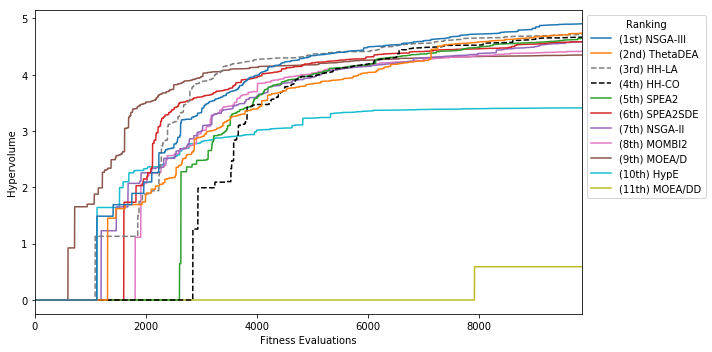

In [25]:
plot_hypervolume(
    ["CMOEADD","HypE","CMOEAD","CMOMBI2","NSGAII","SPEA2SDE","SPEA2","CHHCO","HHLA","ThetaDEA","NSGAIII"],
    "hvall.pdf"
)

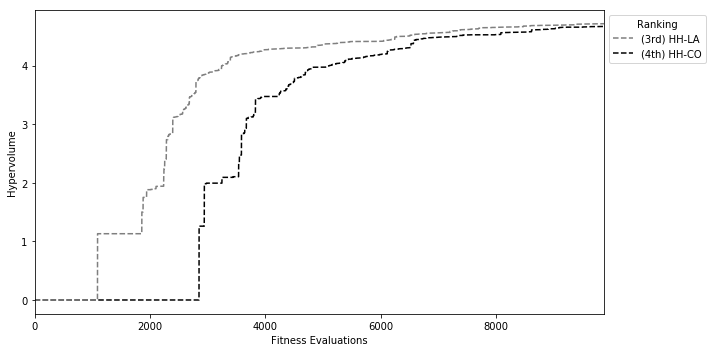

In [26]:
plot_hypervolume(
    ["CHHCO","HHLA"],
    "hvhhs.pdf"
)